# Children Anemia Level Classification :

## About Dataset : 
This study utilized cross-sectional data from the 2018 Nigeria Demographic and Health Surveys (NDHS) to investigate the impact of mothers' age and various socioeconomic factors on the anemia levels of children aged 0-59 months in Nigeria. The NDHS, conducted every five years, is a comprehensive, nationally representative household survey. Covering all 36 states of Nigeria and the Federal Capital Territory (FCT), the study focused on children aged 0-59 months and mothers aged 15-49 years.

Several key variables were considered in the survey, including household income measured by the wealth index, current age grouped in 5-year intervals, type of residence (urban or rural), highest education level attained, total number of births in the last five years, and the respondent's age at first birth. After meticulous data cleaning, Chi-square tests were employed to examine relationships between socioeconomic factors and anemia levels in children aged 0-59 months, with anemia level as the predictor variable and mothers' age, education level, wealth index, recent births, mosquito net usage, among others, as explanatory variables.

To delve deeper into these relationships, ordinal logistic regression was employed to analyze the connection between the dependent variable (anemia level) and independent variables, offering a nuanced understanding of the complex interplay between various factors influencing child health in Nigeria.

## Importing Libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset 

In [2]:
df = pd.read_csv('children anemia.csv')
df.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


## Exploring Dataset

In [3]:
# Checking the null data 
df.isnull().sum()

Age in 5-year groups                                                         0
Type of place of residence                                                   0
Highest educational level                                                    0
Wealth index combined                                                        0
Births in last five years                                                    0
Age of respondent at 1st birth                                               0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Anemia level                                                             20788
Have mosquito bed net for sleeping (from household questionnaire)            0
Smokes cigarettes                                                            0
Current marital status                                                       0
Currently residing with husband/partner                                   1698
When child put to breast                            

In [4]:
df.shape

(33924, 17)

In [5]:
df['Anemia level.1']

0               NaN
1               NaN
2               NaN
3        Not anemic
4               NaN
            ...    
33919    Not anemic
33920    Not anemic
33921    Not anemic
33922      Moderate
33923           NaN
Name: Anemia level.1, Length: 33924, dtype: object

### I have two options to handle NaN values (Dependent Variable :Anemia level.1)  :

- Remove the NaN values rows as it's predicting output is NaN.
- Fill the mode value here but I can't falsely replace anything specially in output data as I found this incorrect and my classification model will not perform well in that case ?

So I can go with 1st option

In [6]:
df.dropna(subset=['Anemia level.1'], inplace=True)

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.shape

(10182, 17)

In [9]:
df.isnull().sum()

Age in 5-year groups                                                        0
Type of place of residence                                                  0
Highest educational level                                                   0
Wealth index combined                                                       0
Births in last five years                                                   0
Age of respondent at 1st birth                                              0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)     120
Anemia level                                                              120
Have mosquito bed net for sleeping (from household questionnaire)           0
Smokes cigarettes                                                           0
Current marital status                                                      0
Currently residing with husband/partner                                   518
When child put to breast                                        

In [10]:
df.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
1,30-34,Urban,Higher,Richest,1,30,113.0,Mild,Yes,No,Married,Living with her,NaN,No,119.0,Not anemic,No
2,35-39,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,102.0,Mild,Yes
3,20-24,Urban,Secondary,Richest,1,19,108.0,Moderate,Yes,No,Married,Living with her,Immediately,No,113.0,Not anemic,Yes
4,25-29,Urban,Higher,Richest,1,24,116.0,Mild,Yes,No,Married,Living with her,Days: 1,No,109.0,Mild,No


In [11]:
df.tail()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
10177,35-39,Rural,Secondary,Richer,2,19,120.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,108.0,Mild,Yes
10178,35-39,Rural,Secondary,Richer,2,19,120.0,Not anemic,Yes,No,Married,Living with her,NaN,No,120.0,Not anemic,Yes
10179,25-29,Rural,No education,Richer,1,27,120.0,Not anemic,Yes,No,Never in union,NaN,Hours: 1,No,120.0,Not anemic,No
10180,25-29,Rural,Higher,Richer,1,22,149.0,Not anemic,Yes,No,Married,Living with her,Hours: 1,No,119.0,Not anemic,No
10181,20-24,Rural,Secondary,Richer,1,21,123.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,75.0,Moderate,Yes


In [12]:
## Let's explore this : Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal) 

hemo_level_adjusted = df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)']
print(hemo_level_adjusted)

0         95.0
1        113.0
2        121.0
3        108.0
4        116.0
         ...  
10177    120.0
10178    120.0
10179    120.0
10180    149.0
10181    123.0
Name: Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal), Length: 10182, dtype: float64


In [13]:
hemo_level_adjusted.isnull().sum()

120

In [14]:
hemo_level_adjusted.var()

247.75335827125377

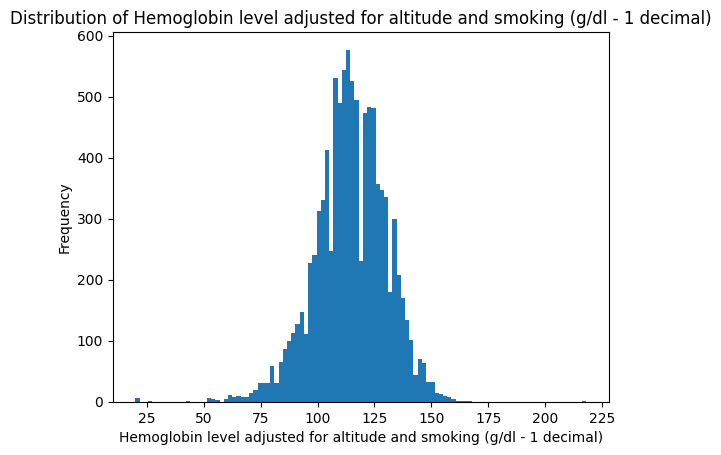

In [15]:
plt.hist(df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'], bins='auto')
plt.title('Distribution of Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)')
plt.xlabel('Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Data is normally distributed so let's choose mean also as per data analysis there are not any outlier's so let's go with mean
mean_anemia_level = hemo_level_adjusted.mean()
# Replace NaN values with the mean
hemo_level_adjusted.fillna(mean_anemia_level, inplace=True)

In [17]:
hemo_level_adjusted.isnull().sum()

0

### We have handles missing values for 'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)' so let's look into other columns as welll

In [18]:
df.isnull().sum()

Age in 5-year groups                                                        0
Type of place of residence                                                  0
Highest educational level                                                   0
Wealth index combined                                                       0
Births in last five years                                                   0
Age of respondent at 1st birth                                              0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)       0
Anemia level                                                              120
Have mosquito bed net for sleeping (from household questionnaire)           0
Smokes cigarettes                                                           0
Current marital status                                                      0
Currently residing with husband/partner                                   518
When child put to breast                                        

### Insigts about the remaining NaN Columns

- Here we can drop `Anemia level` columns because we already have our target variable.
- We can handle `When child put to breast` because target value is dependend on this feature.
- We can drop `Currently residing with husband/partner` as it anemia doesn't depend on this factor

In [19]:
# Let's drop the columns that we are not using 
columns_to_drop = ['Currently residing with husband/partner','Anemia level']
df.drop(columns=columns_to_drop,inplace=True)

In [20]:
df.shape

(10182, 15)

In [21]:
## Let's handle NaN values of When child put to breast
breast_feed = df['When child put to breast']
print(breast_feed)

0              105.0
1                NaN
2        Immediately
3        Immediately
4            Days: 1
            ...     
10177    Immediately
10178            NaN
10179       Hours: 1
10180       Hours: 1
10181    Immediately
Name: When child put to breast, Length: 10182, dtype: object


In [22]:
breast_feed.unique()

array(['105.0', nan, 'Immediately', 'Days: 1', 'Hours: 1', '103.0',
       '203.0', '102.0', '111.0', '106.0', '104.0', '202.0', '107.0',
       '108.0', '120.0', '123.0', '110.0', '112.0', '207.0', '109.0',
       '113.0', '205.0', '115.0', '117.0', '212.0', '114.0', '204.0',
       '119.0', '211.0', '121.0', '214.0', '206.0', '118.0', '210.0',
       '208.0', '116.0', '223.0', '220.0'], dtype=object)

In [23]:
breast_feed.shape

(10182,)

In [24]:
breast_feed.isnull().sum()

3817

###  After analysing the data of that carefully  I have found out that :
- This columns have almost 26% of data missing
- It have categorical and numerical data and it's numerical data doesn't signifies anything like it's days or hours  or seconds etc.

So I am discarding this column as well as I want my model would be as generic as possible.

In [25]:
df.drop(columns='When child put to breast',inplace=True)

In [26]:
df.shape

(10182, 14)

In [27]:
df.isnull().sum()

Age in 5-year groups                                                     0
Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Births in last five years                                                0
Age of respondent at 1st birth                                           0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    0
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Had fever in last two weeks                                              0
Hemoglobin level adjusted for altitude (g/dl - 1 decimal)                0
Anemia level.1                                                           0
Taking iron pills, sprink

### Now at this step we have clean Null Data and Now we have insightful data which we can use further

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10182 entries, 0 to 10181
Data columns (total 14 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   10182 non-null  object 
 1   Type of place of residence                                             10182 non-null  object 
 2   Highest educational level                                              10182 non-null  object 
 3   Wealth index combined                                                  10182 non-null  object 
 4   Births in last five years                                              10182 non-null  int64  
 5   Age of respondent at 1st birth                                         10182 non-null  int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  10182 non-null 

## Separating Dependent And Independent Variables 

In [29]:
y = df['Anemia level.1']
X = df.drop(columns='Anemia level.1',axis=1)

In [30]:
X.shape

(10182, 13)

In [31]:
print(y)

0        Not anemic
1        Not anemic
2              Mild
3        Not anemic
4              Mild
            ...    
10177          Mild
10178    Not anemic
10179    Not anemic
10180    Not anemic
10181      Moderate
Name: Anemia level.1, Length: 10182, dtype: object


## Visualizing the Data so that we can take necessary actions on the basis of that 

In [32]:
y.unique()

array(['Not anemic', 'Mild', 'Moderate', 'Severe'], dtype=object)

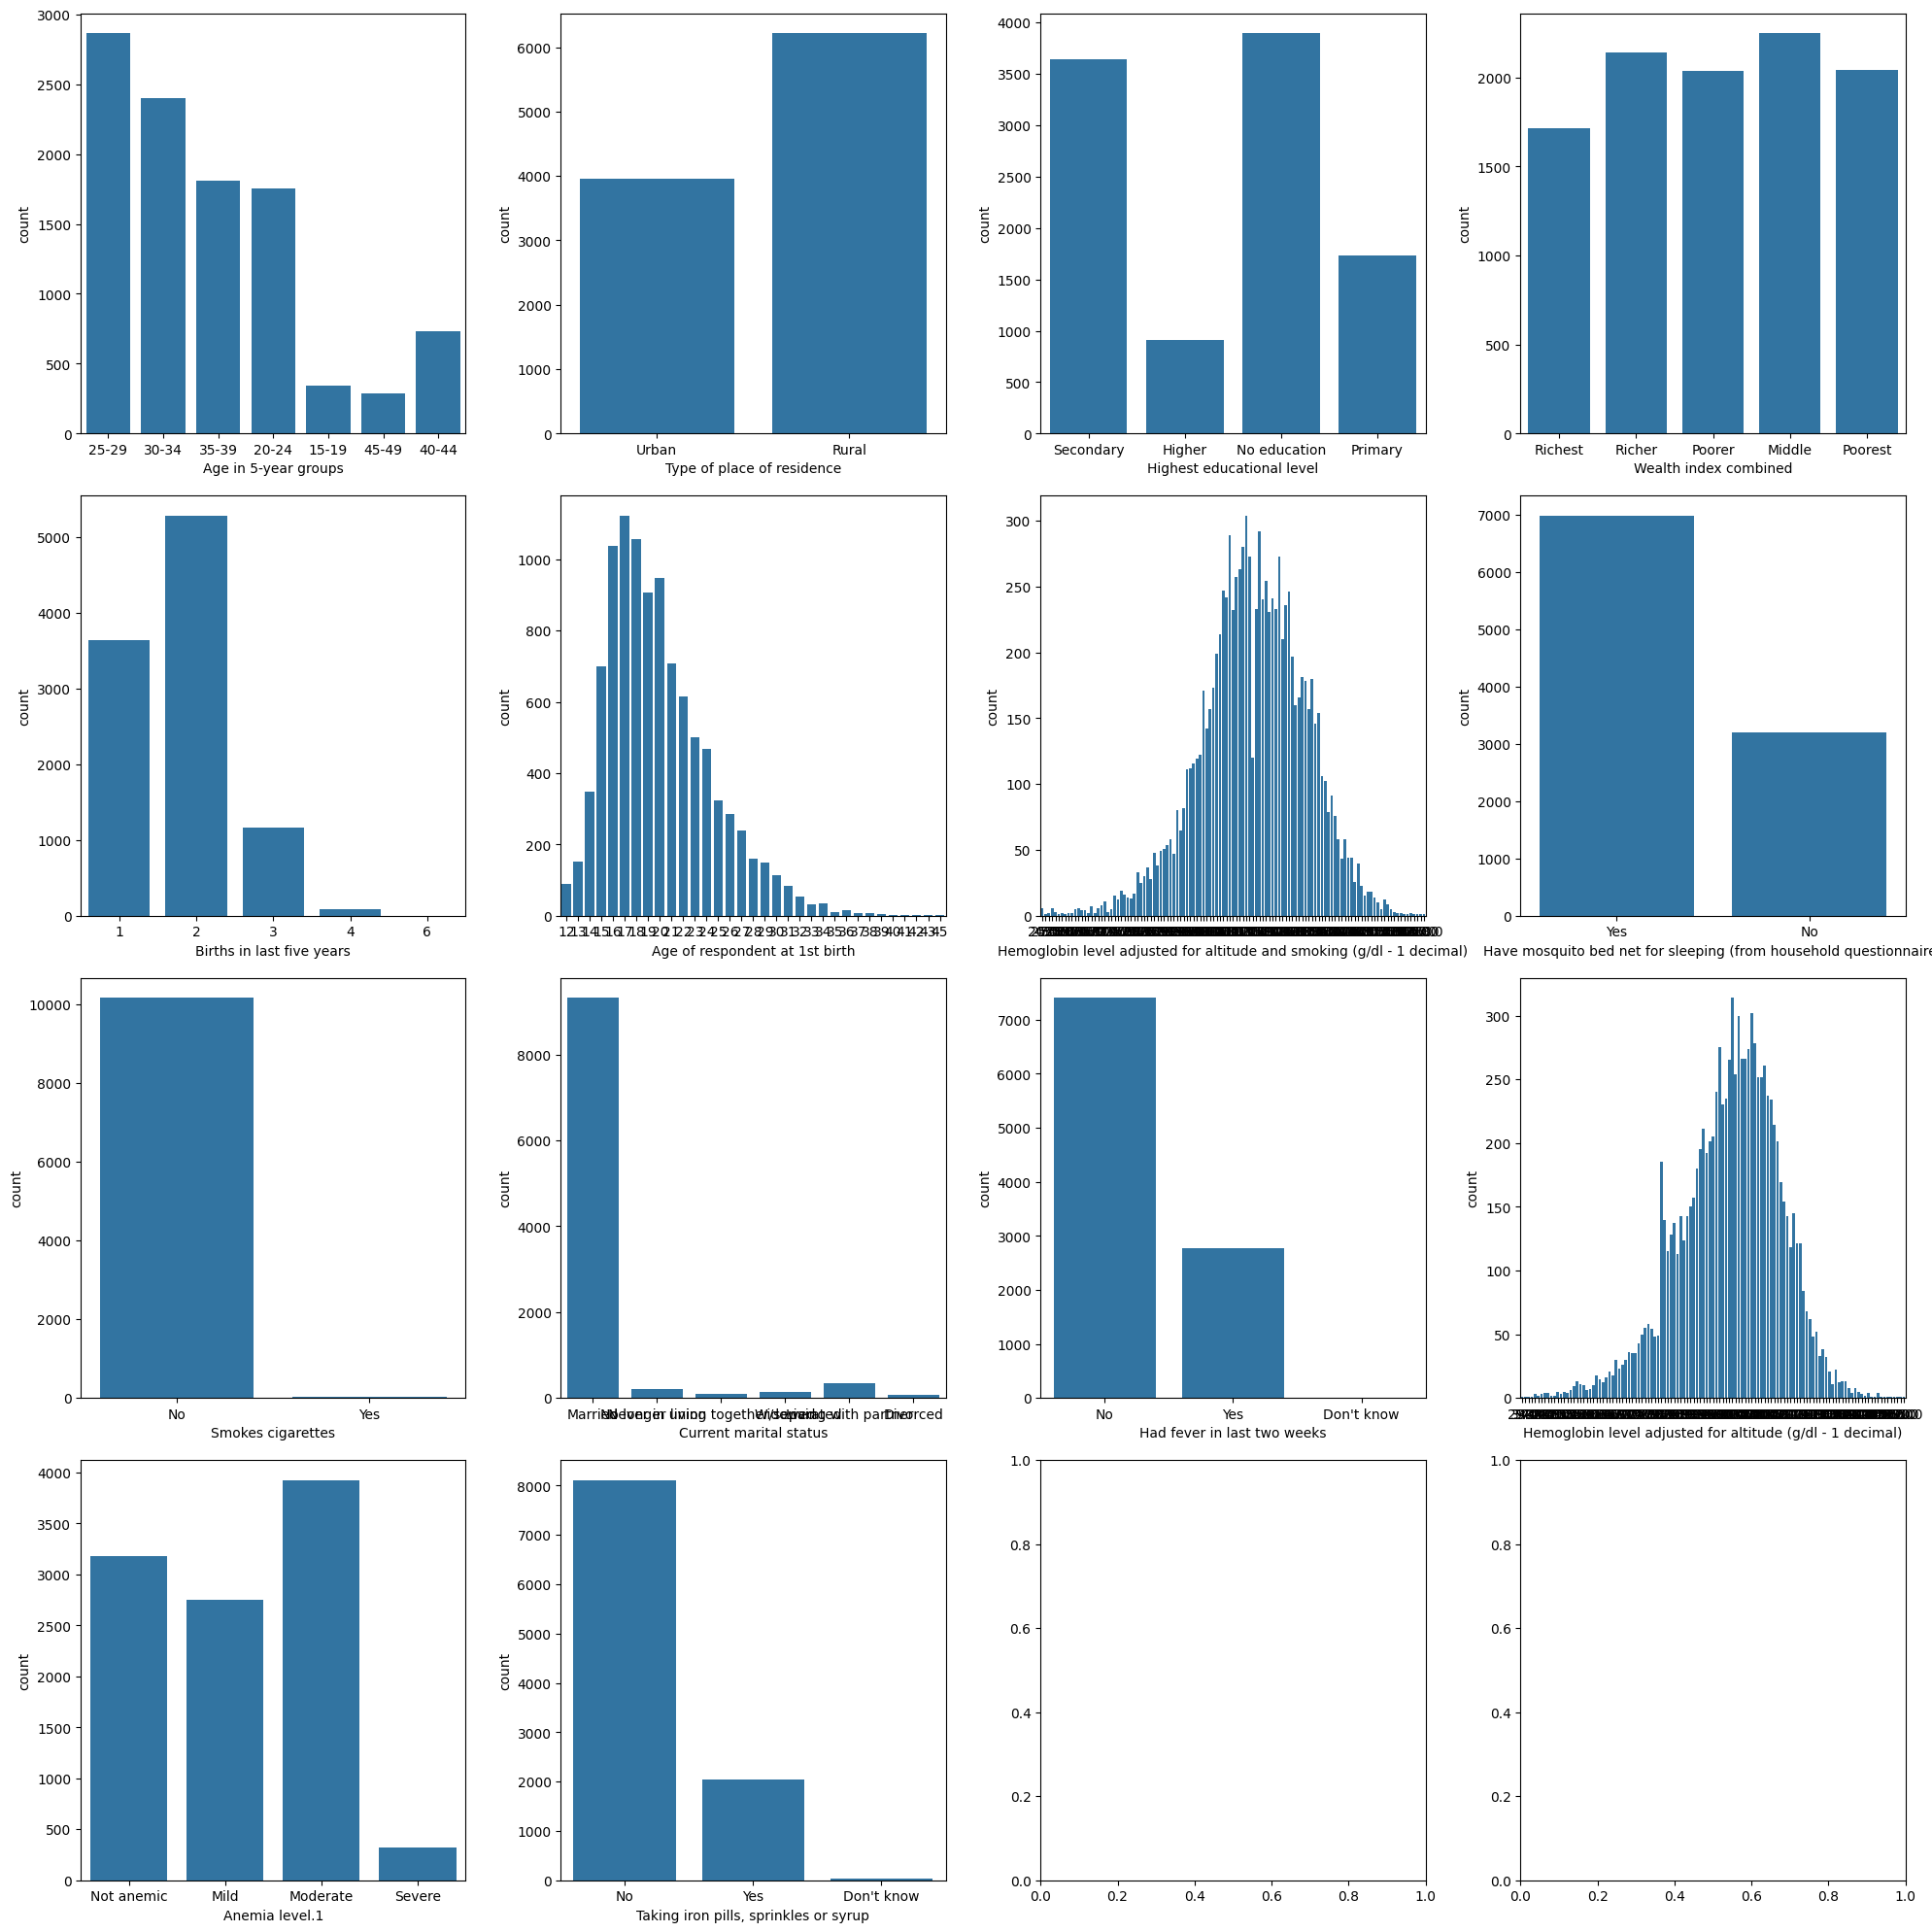

In [33]:
count=0
fig, ax=plt.subplots(4,4,figsize=(20,20))
ax=ax.flatten()
for i in df.columns:
    sns.countplot(df,x=i,ax=ax[count])
    count+=1
plt.tight_layout()

## Now let's focus on converting categorical data into numerical data 

In [34]:
X.shape

(10182, 13)

In [36]:
X['Age in 5-year groups'].unique()

array(['25-29', '30-34', '35-39', '20-24', '15-19', '45-49', '40-44'],
      dtype=object)

In [ ]:
X['Age in 5-year groups'] = X['Age in 5-year groups'].apply(lambda x: sum(map(int, x.split('-'))) / 2 if isinstance(x, str) else x)

In [ ]:
X

In [ ]:
X['Age in 5-year groups'].dtype